array([[1.        , 3.        , 0.09717965, 2.        ],
       [2.        , 4.        , 0.14442429, 3.        ],
       [0.        , 5.        , 0.18601357, 4.        ]])

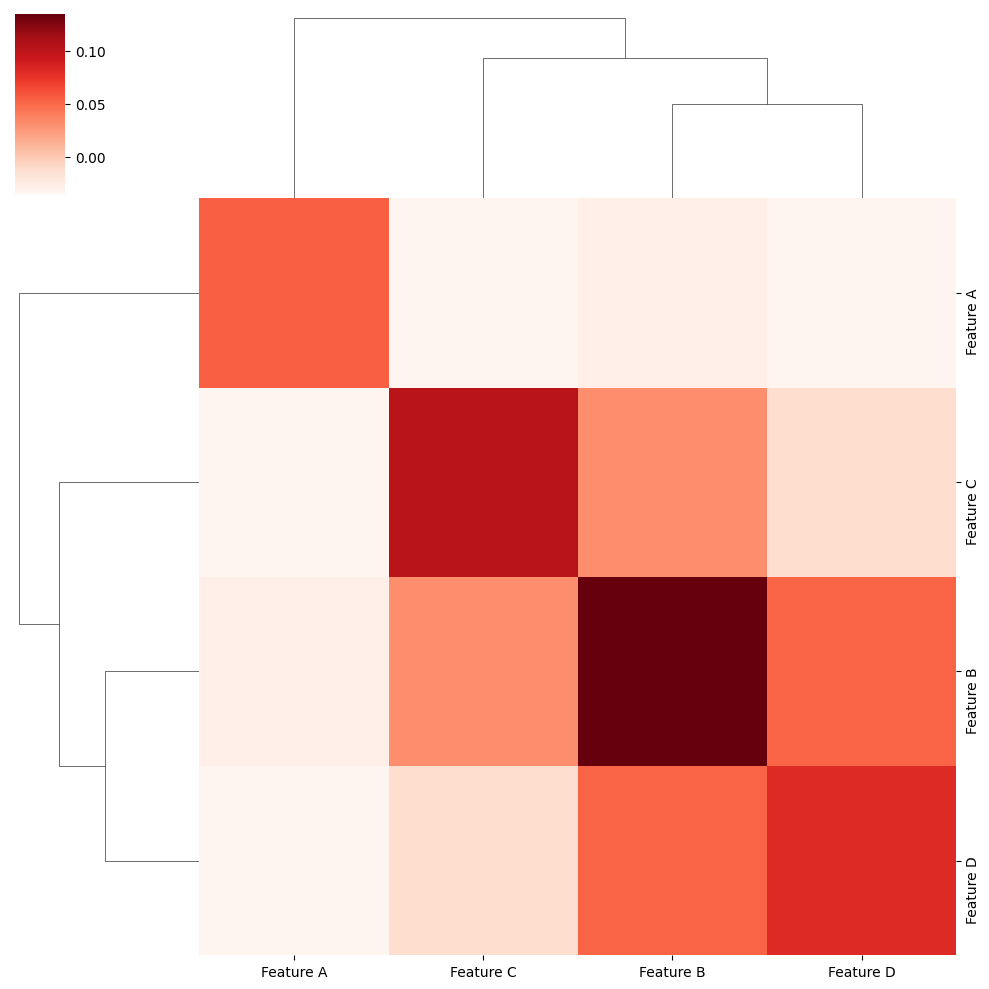

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly 
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# Generate sample data
np.random.seed(42)
data = pd.DataFrame(
    np.random.rand(10, 4),  # 10 samples, 4 features
    columns=["Feature A", "Feature B", "Feature C", "Feature D"]
)

# Compute correlation and covariance matrices
corr_matrix = data.corr()
cov_matrix = data.cov()

h = sns.clustermap(cov_matrix, cmap='Reds')
Z = h.dendrogram_col.linkage  
Z


array([[ 1.        , -0.33525076, -0.46859001, -0.51464947],
       [-0.33525076,  1.        ,  0.27270313,  0.50600699],
       [-0.46859001,  0.27270313,  1.        , -0.13651269],
       [-0.51464947,  0.50600699, -0.13651269,  1.        ]])

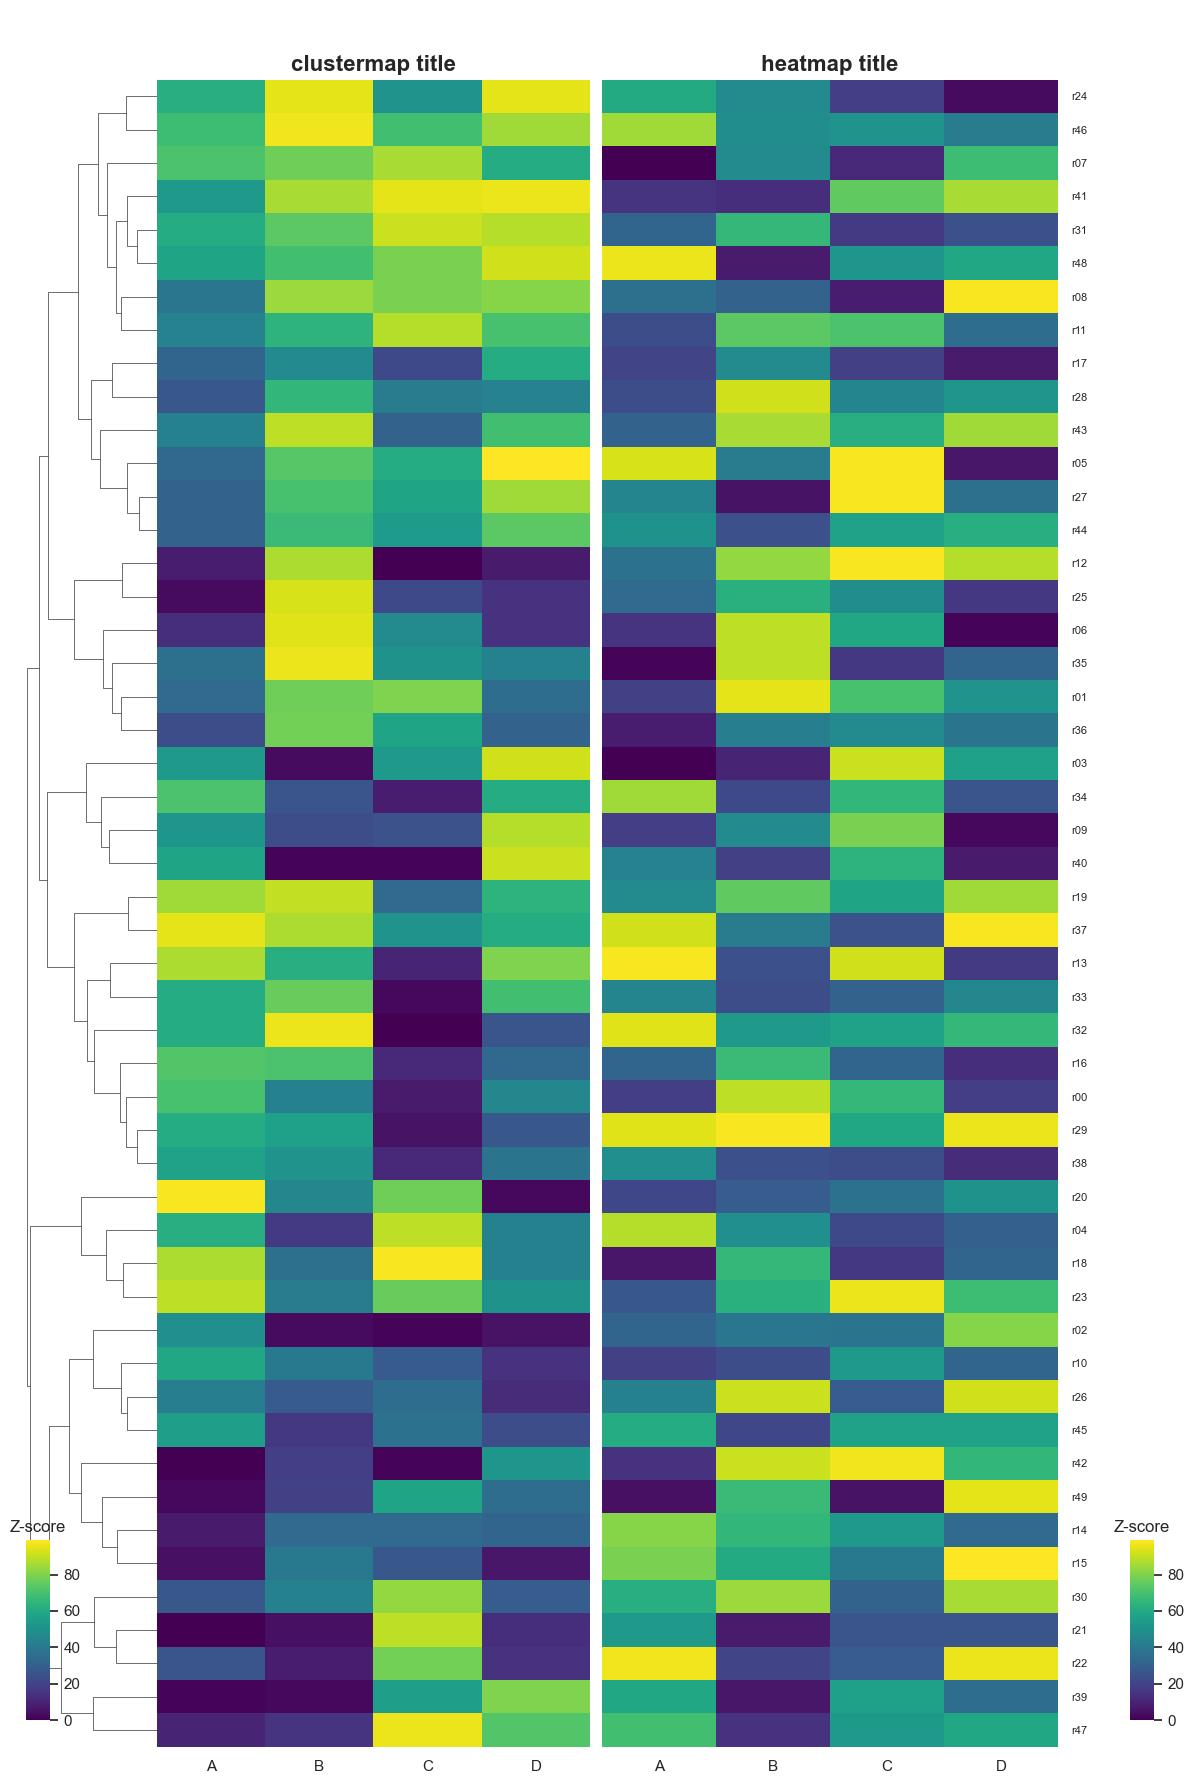

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

index = [f'r{i:02}' for i in range(50)]
df = pd.DataFrame(np.random.randint(0, 100, size=(50, 4)), columns=list('ABCD'), index=index)
df2 = pd.DataFrame(np.random.randint(0, 100, size=(50, 4)), columns=list('ABCD'), index=index)

# clustermap from df1
g = sns.clustermap(df, figsize=(12, 18), col_cluster=False, yticklabels=True, cmap='viridis',
                   dendrogram_ratio=(0.12, 0.04),  # space for the left and top dendograms
                   cbar_pos=[0.02, 0.04, 0.02, 0.1])
g.ax_cbar.set_title('Z-score')
g.ax_heatmap.set_xlabel('')  # remove possible xlabel
g.ax_heatmap.set_title('clustermap title', weight="bold", fontsize=16)  # Set a custom title

# extract the order of the y tick labels of the clustermap (before removing the ticks)
new_index = [t.get_text() for t in g.ax_heatmap.get_yticklabels()]
# remove right ticks and tick labels of the clustermap
g.ax_heatmap.tick_params(axis='y', right=False, labelright=False)
g.ax_heatmap.tick_params(axis='x', labelbottom=True, bottom=False)

# get position of heatmap
heatmap_bbox = g.ax_heatmap.get_position()
# make space for the right heatmap by reducing the size of the clustermap's heatmap
g.ax_heatmap.set_position([heatmap_bbox.x0, heatmap_bbox.y0, 0.49 - heatmap_bbox.x0, heatmap_bbox.height])

ax2 = plt.axes([0.50, heatmap_bbox.y0, 0.38, heatmap_bbox.height])
cbar_2_ax = plt.axes([0.94, 0.04, 0.02, 0.1])

# plot heatmap in the new axes, reordering the rows similar as in the clustermap
sns.heatmap(df2.reindex(new_index), cmap='viridis', cbar=True, yticklabels=True, ax=ax2, cbar_ax=cbar_2_ax)

ax2.tick_params(axis='y', labelsize=8, labelright=True, left=False, labelleft=False, labelrotation=0)
ax2.tick_params(axis='x', labelbottom=True, bottom=False)

ax2.set_title('heatmap title', weight="bold", fontsize=16)  # Set a custom title
cbar_2_ax.set_title('Z-score')

# title = "Clustermap (left) & heatmap (right)"
# plt.suptitle(title, weight="bold", fontsize=20)

plt.show()

['B', 'C', 'A', 'D', 'E']


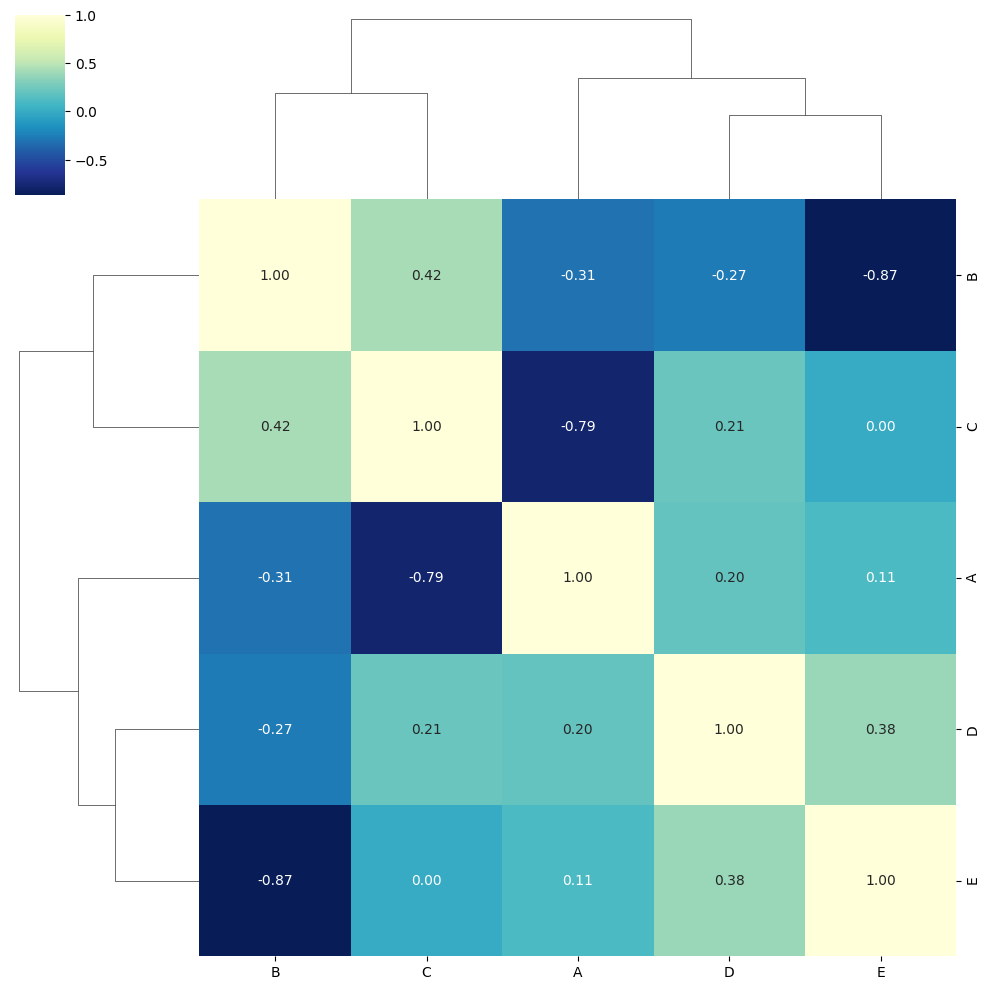

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

# Example DataFrame
np.random.seed(42)
data = np.random.rand(5, 5)
df = pd.DataFrame(data, columns=["A", "B", "C", "D", "E"])

# Create a clustermap
plot = sns.clustermap(df.corr(), cmap="YlGnBu_r", annot=True, fmt=".2f")

# Get the reordered indices for rows and columns
reordered_index = plot.dendrogram_row.reordered_ind
reordered_columns = plot.dendrogram_col.reordered_ind

# Use these indices to reorder the original correlation matrix
clustered_corr = df.corr().iloc[reordered_index, :].iloc[:, reordered_columns]

print(clustered_corr.columns.tolist())


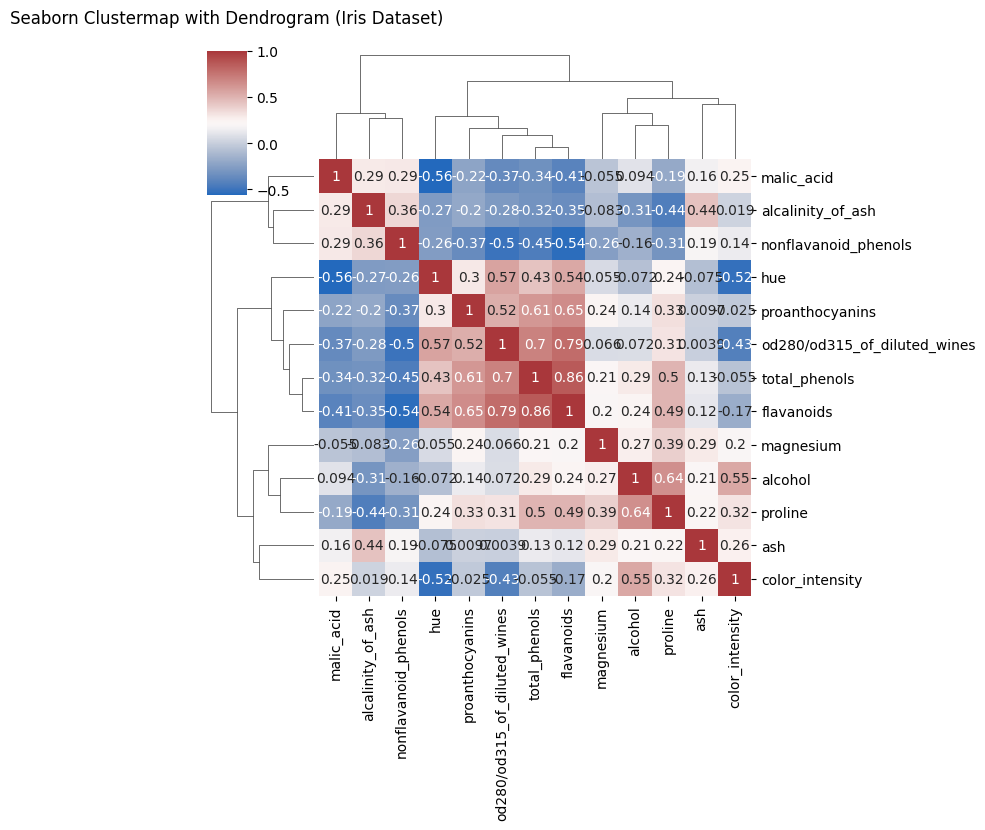

In [3]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_diabetes, load_iris, load_wine
import matplotlib.pyplot as plt

# Load the Iris dataset
diabetes = load_wine()

# Get the features (X)
X = diabetes.data
iris_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Compute the correlation matrix
corr = iris_df.corr()

# Create a clustermap
s = sns.clustermap(corr, 
               cmap='vlag',    # Colormap for heatmap
               figsize=(8, 8),
               annot=True)     # Display correlation values
plt.title("Seaborn Clustermap with Dendrogram (Iris Dataset)", pad=20)
plt.show()


In [13]:
Z = s.dendrogram_col.linkage  
Z

array([[2.        , 3.        , 0.09765659, 2.        ],
       [0.        , 4.        , 0.37863902, 3.        ],
       [1.        , 5.        , 2.5116919 , 4.        ]])

In [ ]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
from sklearn.neighbors import KNeighborsClassifier
# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train GradientBoostingClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
result=[]
best_accuracy = 0
best_preds = []
for i,metric in enumerate(['manhattan','euclidean']):
    for n  in range(2,5):
        model = KNeighborsClassifier(n_neighbors=n,metric=metric)
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        accuracy = accuracy_score(y_test,preds)
        result.append([metric,n,accuracy])
        if accuracy > best_accuracy:
          best_accuracy = accuracy
          best_model = model
          best_n = n
          best_preds = preds
        
print(best_n)
print(result)

        
from sklearn.inspection import permutation_importance




3
[['manhattan', 2, 0.9777777777777777], ['manhattan', 3, 1.0], ['manhattan', 4, 1.0], ['euclidean', 2, 1.0], ['euclidean', 3, 1.0], ['euclidean', 4, 1.0]]


In [ ]:

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
import matplotlib
matplotlib.use("AGG")
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
from sklearn.model_selection import train_test_split


data = pd.read_csv('./diabetes.csv')
y= data.Outcome
X = data.iloc[:,0:8]


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = GaussianNB().fit(X_train,y_train)

In [15]:
predictions = model.predict(X_test)
probas = model.predict_proba(X_test)
curve = roc_curve(y_test,probas[:,1])
for i in range(2):
    auc = roc_auc_score(y_test,probas[:,i])
    print(auc)

0.2095198675496689
0.7904801324503311


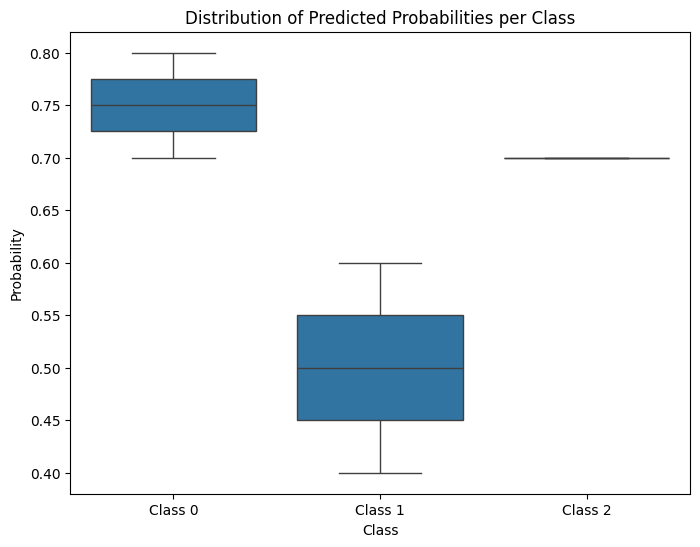

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Example predicted probabilities and true labels
predicted_probs = np.array([
    [0.7, 0.2, 0.1],
    [0.1, 0.6, 0.3],
    [0.3, 0.4, 0.3],
    [0.2, 0.1, 0.7],
    [0.8, 0.1, 0.1]
])  # Replace with model output

true_labels = np.array([0, 1, 1, 2, 0])  # True labels (ground truth)

# Organize data for box plot
data = []
for i, label in enumerate(np.unique(true_labels)):
    probs = predicted_probs[true_labels == label, label]
    data.append(pd.DataFrame({"Class": [f"Class {label}"] * len(probs), "Probability": probs}))

df = pd.concat(data)

# Plot box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x="Class", y="Probability", data=df)
plt.title("Distribution of Predicted Probabilities per Class")
plt.show()


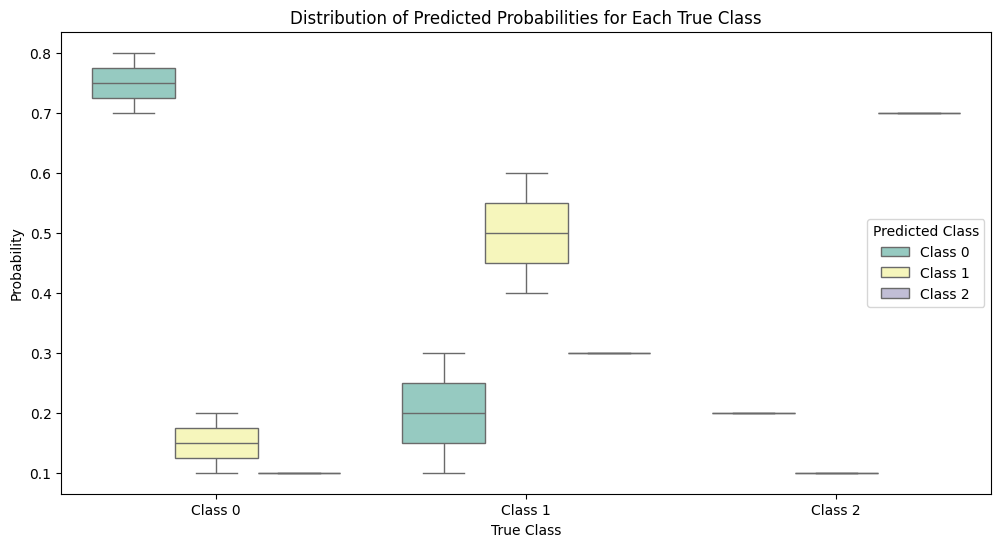

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example predicted probabilities and true labels
predicted_probs = np.array([
    [0.7, 0.2, 0.1],
    [0.1, 0.6, 0.3],
    [0.3, 0.4, 0.3],
    [0.2, 0.1, 0.7],
    [0.8, 0.1, 0.1]
])  # Replace with model output

true_labels = np.array([0, 1, 1, 2, 0])  # True labels (ground truth)

# Organize data for box plot
data = []
for i, true_label in enumerate(np.unique(true_labels)):
    for class_idx in range(predicted_probs.shape[1]):
        probs = predicted_probs[true_labels == true_label, class_idx]
        data.append(pd.DataFrame({
            "True Class": [f"Class {true_label}"] * len(probs),
            "Predicted Class": [f"Class {class_idx}"] * len(probs),
            "Probability": probs
        }))

df = pd.concat(data)

# Plot grouped box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x="True Class", y="Probability", hue="Predicted Class", data=df, palette="Set3")
plt.title("Distribution of Predicted Probabilities for Each True Class")
plt.legend(title="Predicted Class")
plt.show()


In [22]:
df

,True Class,Predicted Class,Probability
0,Class 0,Class 0,0.7
1,Class 0,Class 0,0.8
0,Class 0,Class 1,0.2
1,Class 0,Class 1,0.1
0,Class 0,Class 2,0.1
1,Class 0,Class 2,0.1
0,Class 1,Class 0,0.1
1,Class 1,Class 0,0.3
0,Class 1,Class 1,0.6
1,Class 1,Class 1,0.4


   True Class Predicted Class    Probability
0  versicolor     Prob_setosa   4.158800e-88
1      setosa     Prob_setosa   1.000000e+00
2   virginica     Prob_setosa  9.831702e-285
3  versicolor     Prob_setosa   9.547453e-92
4  versicolor     Prob_setosa  1.086796e-103


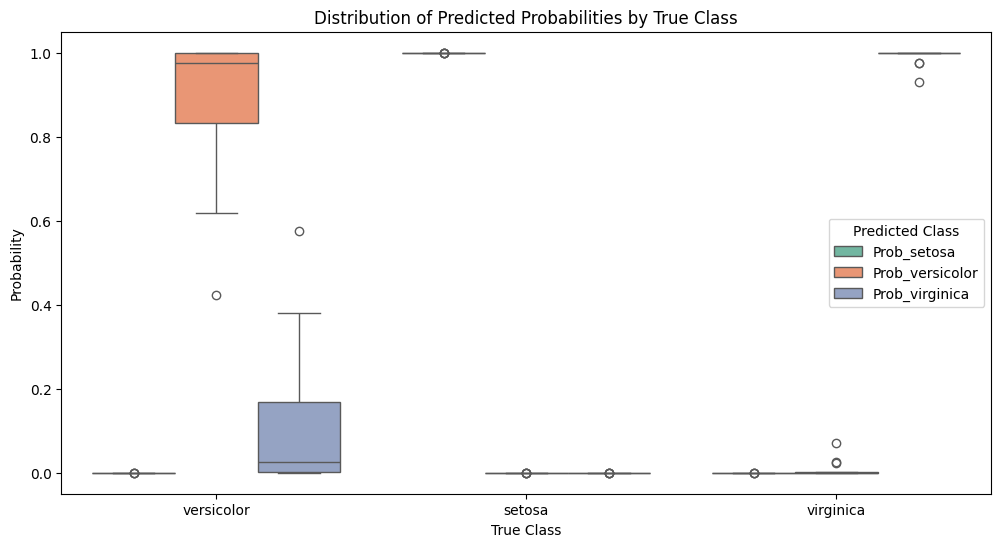

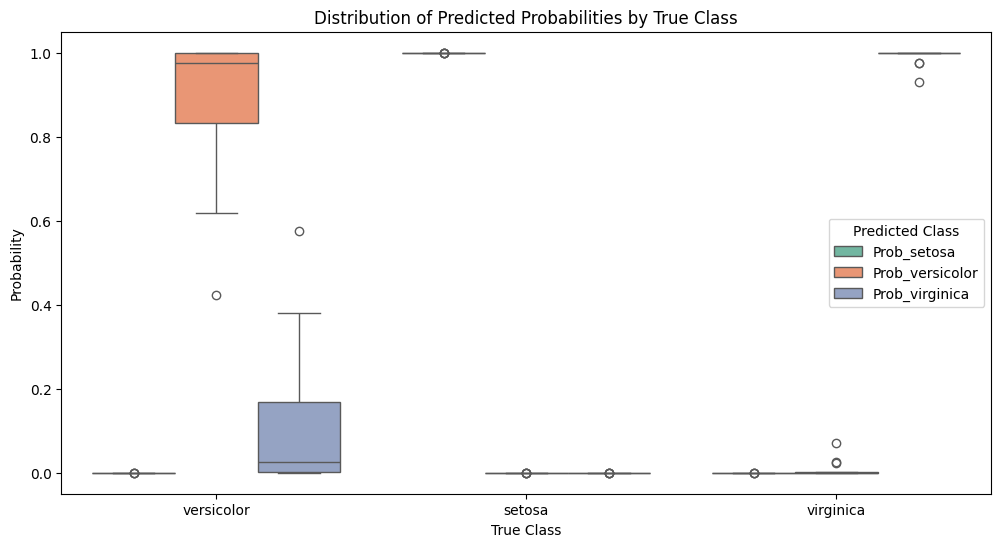

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib
matplotlib.use("AGG")
%matplotlib inline
from sklearn.naive_bayes import GaussianNB
# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
class_names = iris.target_names  # ['setosa', 'versicolor', 'virginica']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_probs = clf.predict_proba(X_test)  # Probabilities for each class
# Create a DataFrame with probabilities and true labels
df = pd.DataFrame(y_pred_probs, columns=[f"Prob_{name}" for name in class_names])
df['True Class'] = [class_names[label] for label in y_test]

# Melt the DataFrame to long format for visualizations
df_melted = df.melt(id_vars="True Class", var_name="Predicted Class", value_name="Probability")
print(df_melted.head())
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x="True Class", y="Probability", hue="Predicted Class", data=df_melted, palette="Set2")
plt.title("Distribution of Predicted Probabilities by True Class")
plt.show()


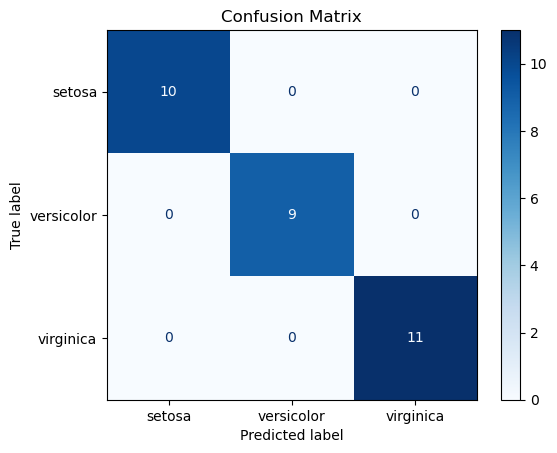

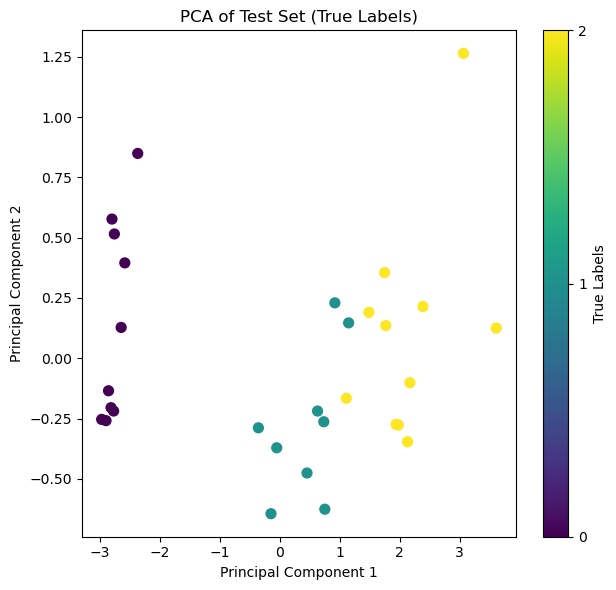

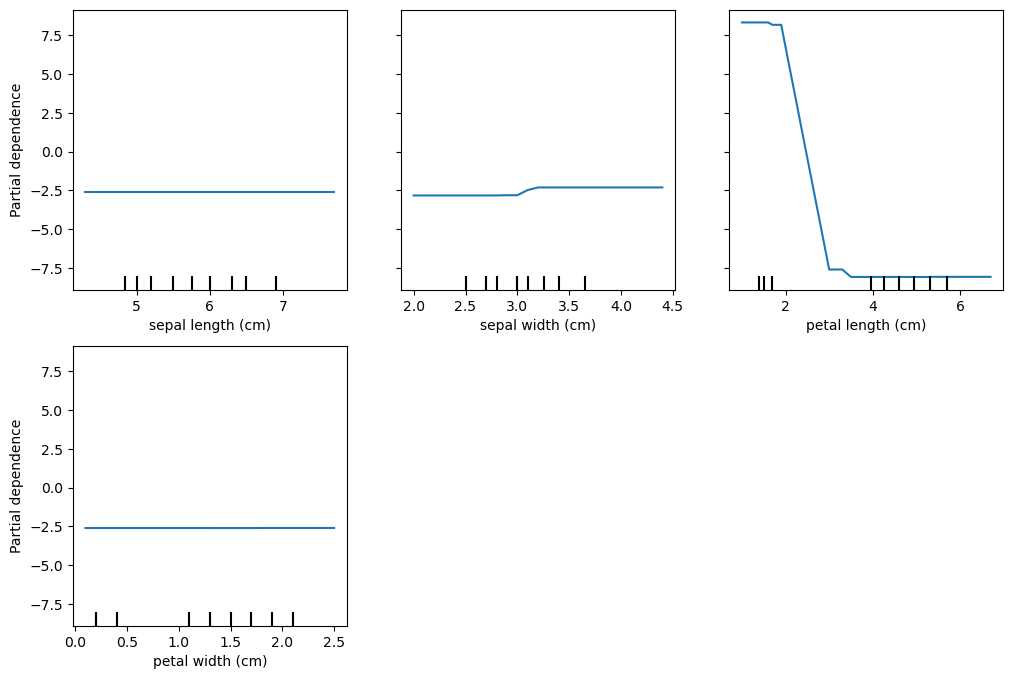

<Figure size 1000x600 with 0 Axes>

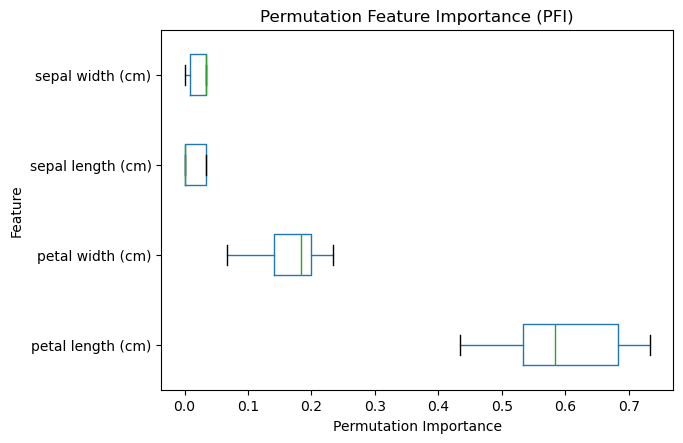

In [12]:
from sklearn.datasets import load_iris
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.inspection import partial_dependence, PartialDependenceDisplay, permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a HistGradientBoostingClassifier
model = HistGradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
# Confusion Matrix
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix")
plt.show()

# PCA of Results
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Plot PCA results with true labels and predicted labels
plt.figure(figsize=(12, 6))

# Subplot 1: PCA with True Labels
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', s=50)
plt.colorbar(scatter, ticks=np.arange(len(class_names)), label="True Labels")
plt.title("PCA of Test Set (True Labels)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")


plt.tight_layout()
plt.show()
# Compute and plot Partial Dependence Plot (PDP)
fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(
    model, X_train, [0, 1,2,3], feature_names=feature_names, ax=ax,target=0
)
plt.show()

# Compute and plot Permutation Feature Importance (PFI)
pfi = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
# Convert PFI results to a DataFrame for easier manipulation
pfi_df = pd.DataFrame({
    "Feature": np.repeat(feature_names, repeats=pfi.importances.shape[1]),
    "Importance": pfi.importances.ravel()
})

# Create boxplots for Permutation Feature Importance
plt.figure(figsize=(10, 6))
pfi_df.boxplot(by="Feature", column="Importance", grid=False, vert=False, showmeans=False)
plt.xlabel("Permutation Importance")
plt.ylabel("Feature")
plt.title("Permutation Feature Importance (PFI)")
plt.suptitle("")  # Remove automatic suptitle from boxplot
plt.show()


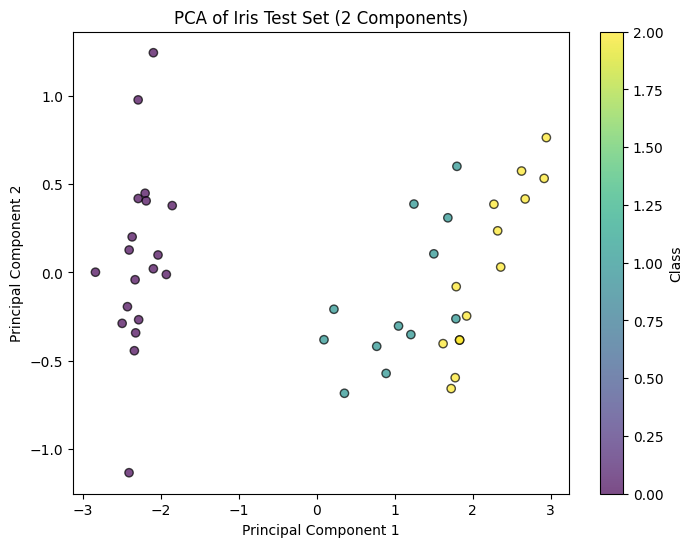

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4352)

# Apply PCA with 2 components on the test set
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Plot the PCA-transformed test set
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Test Set (2 Components)')
plt.colorbar(scatter, label='Class')
plt.show()


sepal length (cm)
(np.float64(0.890168764861295), np.float64(0.3608298881130249))
sepal width (cm)
(np.float64(-0.4601427064479079), np.float64(0.8827162691623839))
petal length (cm)
(np.float64(0.9915551834193607), np.float64(0.023415188379165907))
petal width (cm)
(np.float64(0.9649789606692492), np.float64(0.06399984704374702))


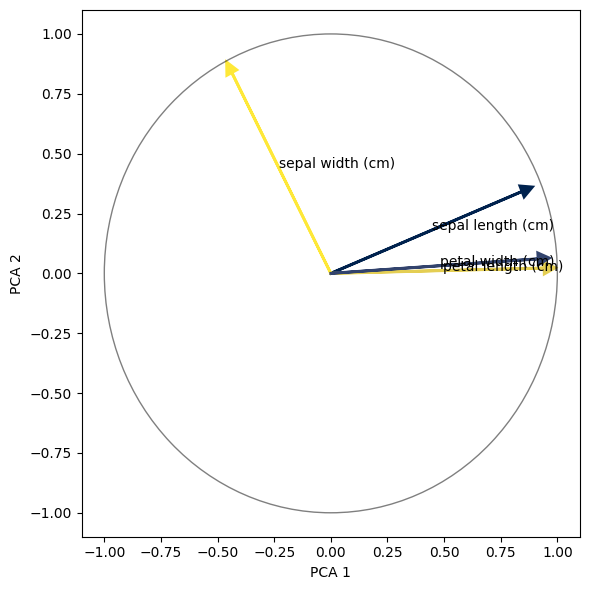

In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
Xstd = StandardScaler().fit_transform(X)
pca = PCA(n_components=4)
Xpca = pca.fit_transform(Xstd)
ccircle = []
eucl_dist = []
for i,j in enumerate(X.T):
    corr1 = np.corrcoef(j,Xpca[:,0])[0,1]
    corr2 = np.corrcoef(j,Xpca[:,1])[0,1]
    ccircle.append((corr1, corr2))
    eucl_dist.append(np.sqrt(corr1**2 + corr2**2))
fig, axs = plt.subplots(figsize=(6, 6))
for i,j in enumerate(eucl_dist):
    print(iris.feature_names[i])
    print(ccircle[i])
    
    arrow_col = plt.cm.cividis((eucl_dist[i] - np.array(eucl_dist).min())/\
                            (np.array(eucl_dist).max() - np.array(eucl_dist).min()) )
    axs.arrow(0,0, # Arrows start at the origin
                ccircle[i][0],  #0 for PC1
                ccircle[i][1],  #1 for PC2
                lw = 2, # line width
                length_includes_head=True, 
                color = arrow_col,
                fc = arrow_col,
                head_width=0.05,
                head_length=0.05)
    axs.text(ccircle[i][0]/2,ccircle[i][1]/2, iris.feature_names[i])
# Draw the unit circle, for clarity
circle = Circle((0, 0), 1, facecolor='none', edgecolor='k', linewidth=1, alpha=0.5)
axs.add_patch(circle)
axs.set_xlabel("PCA 1")
axs.set_ylabel("PCA 2")
plt.tight_layout()
plt.show()

In [4]:
ccircle

[(np.float64(0.890168764861295), np.float64(0.3608298881130249)),
 (np.float64(-0.4601427064479079), np.float64(0.8827162691623839)),
 (np.float64(0.9915551834193607), np.float64(0.023415188379165907)),
 (np.float64(0.9649789606692492), np.float64(0.06399984704374702))]